In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as mpatches
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 6, 'axes.linewidth': 1, 'xtick.major.width': 1, 'xtick.major.size': 5, 'ytick.major.width': 1, 'ytick.major.size': 5})
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
PROJECT_DIR = "/Users/deeprobanerjee/Documents/bmi_project/BMI_monogenic"

In [3]:
def save_pdf(save_file, fig):
    os.makedirs(os.path.dirname(save_file), exist_ok=True)
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight',dpi=300)
    pdf.close()
    return

In [4]:
genomic_lambda_df = pd.read_csv("../data/metal/genomic_lambda.csv")

# All of Us

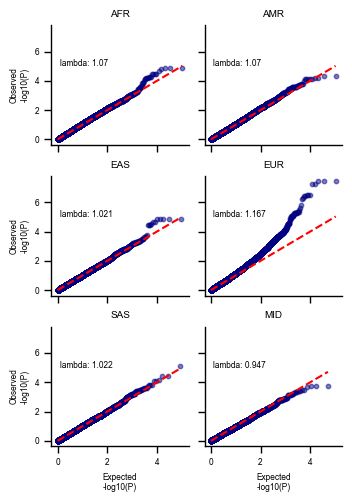

In [5]:
ancestry = np.array(["afr", "amr", "eas", "eur", "sas", "mid"]).reshape(3,2)

fig,ax = plt.subplots(3,2, sharex=True, sharey=True, figsize=(3.5, 5))
biobank = "aou"

for i in range(3):
    for j in range(2):
        anc = ancestry[i,j]
        df = pd.read_csv(f"../data/meta/processed/all_ancestry/bmi_rint_{anc}_{biobank}.tsv.gz", sep="\t")
        p_values = df.p_value
        # Compute observed -log10(p)
        observed = -np.log10(np.sort(p_values))
        # Compute expected -log10(p) under uniform distribution
        n = len(p_values)
        expected = -np.log10((np.arange(1, n + 1) - 0.5) / n)
        # expected = -np.log10((np.arange(1, n + 1) / (n + 1)))
        ax[i][j].scatter(expected, observed, color='navy', s=10, alpha=0.5, label="QQ points", rasterized=True)
        ax[i][j].plot([0, max(expected)], [0, max(expected)], linestyle='--', color='red', label="y = x")
        # Set title
        ax[i, j].set_title(f"{anc.upper()}")
        # Remove upper and right spines
        ax[i, j].spines["top"].set_visible(False)
        ax[i, j].spines["right"].set_visible(False)
        genomic_lambda = genomic_lambda_df.loc[
            (genomic_lambda_df.ancestry==anc)&
            (genomic_lambda_df.biobank==biobank), "lambda"].values[0]
        ax[i, j].text(0.1, 5, f"lambda: {genomic_lambda}")

        # Set x-axis label only for bottom row (i == 2)
        if i == 2:
            ax[i, j].set_xlabel("Expected\n-log10(P)")

        # Set y-axis label only for the leftmost column (j == 0)
        if j == 0:
            ax[i, j].set_ylabel("Observed\n-log10(P)")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [6]:
filename = os.path.join(PROJECT_DIR, "data/meta/figures/qqplot_aou.pdf")
save_pdf(filename, fig)

# UK Biobank

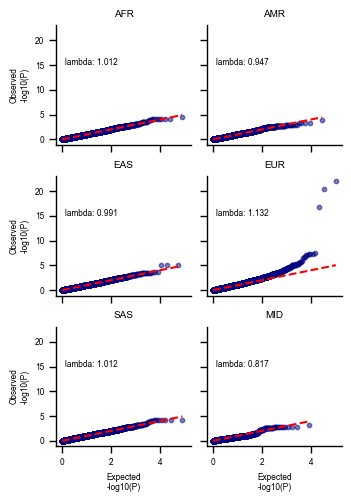

In [7]:
ancestry = np.array(["afr", "amr", "eas", "eur", "sas", "mid"]).reshape(3,2)

fig,ax = plt.subplots(3,2, sharex=True, sharey=True, figsize=(3.5,5))
biobank = "ukb"

for i in range(3):
    for j in range(2):
        anc = ancestry[i,j]
        df = pd.read_csv(f"../data/meta/processed/all_ancestry/bmi_rint_{anc}_{biobank}.tsv.gz", sep="\t")
        p_values = df.p_value
        # Compute observed -log10(p)
        observed = -np.log10(np.sort(p_values))
        # Compute expected -log10(p) under uniform distribution
        n = len(p_values)
        expected = -np.log10((np.arange(1, n + 1) - 0.5) / n)
        # expected = -np.log10((np.arange(1, n + 1) / (n + 1)))
        ax[i][j].scatter(expected, observed, color='navy', s=10, alpha=0.5, label="QQ points", rasterized=True)
        ax[i][j].plot([0, max(expected)], [0, max(expected)], linestyle='--', color='red', label="y = x")
        # Set title
        ax[i, j].set_title(f"{anc.upper()}")
        # Remove upper and right spines
        ax[i, j].spines["top"].set_visible(False)
        ax[i, j].spines["right"].set_visible(False)
        genomic_lambda = genomic_lambda_df.loc[
            (genomic_lambda_df.ancestry==anc)&
            (genomic_lambda_df.biobank==biobank), "lambda"].values[0]
        ax[i, j].text(0.1, 15, f"lambda: {genomic_lambda}")

        # Set x-axis label only for bottom row (i == 2)
        if i == 2:
            ax[i, j].set_xlabel("Expected\n-log10(P)")

        # Set y-axis label only for the leftmost column (j == 0)
        if j == 0:
            ax[i, j].set_ylabel("Observed\n-log10(P)")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [8]:
filename = os.path.join(PROJECT_DIR, "data/meta/figures/qqplot_ukb.pdf")
save_pdf(filename, fig)